### 생선 분류 - 최적의 k 찾기 : 하이퍼 파라미터
 - 데이터셋 : fish.csv
 - 피쳐/특성 : Weight, Length
 - 타겟/라벨 : Species
 - 학습 방법 : 지도학습 => 분류
 - 학습알고리즘 : 최근접이웃알고리즘
 - 하이퍼파라미터 튜닝 : 모델 성능 개선

In [120]:
import pandas as pd


In [121]:
DATA_FILE = '../data/fish.csv'

In [122]:
# 행 : Bream Smelt 카럶 : Species Weight Height 0 1 2

fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [123]:
names = fishDF['Species'].unique().tolist()

value = {name:idx for idx, name in enumerate(names,1)}
value

{'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7}

In [124]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')
twoDF = fishDF[mask]
twoDF.reset_index(drop = True, inplace = True)
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [125]:
twoDF['FCode'] = twoDF.loc[:, 'Species'].replace({'Bream': 1,
 'Roach': 2,
 'Whitefish': 3,
 'Parkki': 4,
 'Perch': 5,
 'Pike': 6,
 'Smelt': 7})

C:\Users\kjy19\AppData\Local\Temp\ipykernel_13252\2953602531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['FCode'] = twoDF.loc[:, 'Species'].replace({'Bream': 1,


In [126]:
twoDF.head()

,Species,Weight,Length,FCode
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


[2] 피쳐와 타겟 분리

In [127]:
features = twoDF[['Weight','Length']]
target = twoDF['FCode']

print(f'features => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

features => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용 테스트용

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
# train : test = 80:20 ===> test_size = 0.2 or train_size = 0.8
# stratify 매개변수 : 분류일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    test_size = 0.2,
                                                    stratify=target,
                                                    random_state=10)

In [130]:
print(f'{X_train.shape}, {X_train.ndim}D')
print(f'{y_train.shape}, {y_train.ndim}D')

print(f'X_test : {X_test.shape}, {X_test.ndim}D')
print(f'X_test : {y_test.shape}, {y_test.ndim}D')

(39, 2), 2D
(39,), 1D
X_test : (10, 2), 2D
X_test : (10,), 1D


In [131]:
# target - (Bream), 1(Smelt)의 비율
# y_train.value_counts()[0]/y_train.shape[0], y_train.value_counts()[1]/y_train.shape[0]


In [132]:
# X_test.value_counts()[0]/X_test.shape[0], y_test.value_counts()[1]/y_test.shape[0]

[3] 피처 스케일링

In [133]:
from sklearn.preprocessing import MinMaxScaler

In [134]:
# 스케일러 인스턴스 생성
mmScaler = MinMaxScaler()

In [135]:
# 데이터에 기반한 MinMaxScaler 동작을 위한 학습 진행
mmScaler.fit(X_train)

MinMaxScaler()

In [136]:
mmScaler.min_, mmScaler.data_min_, mmScaler.scale_, mmScaler.data_max_
# scikit.learn - API - sklearn.preprocessing 페이지에서 설명중이심.

(array([-0.00674519, -0.31410256]),
 array([6.7, 9.8]),
 array([0.00100675, 0.03205128]),
 array([1000.,   41.]))

In [137]:
X_train_scaled = mmScaler.transform(X_train)

In [138]:
# 학습용 데이터셋 ==> 스케일링 ==> ndarray 타입 반환
X_train_scaled.shape
# X_train.max(), X_train.min/()

(39, 2)

In [139]:
# 테스트용 데이터셋 ==> 스케일링 
X_test_scaled = mmScaler.transform(X_test)
X_test_scaled.shape, X_test_scaled.min(), X_test_scaled.max()

((10, 2), 0.0033222591362126247, 0.8489882210812445)

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
model = KNeighborsClassifier()

In [142]:
model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [143]:
# 학습 후 모델 파라미터
model.classes_ , model.n_samples_fit_
# model.feature_names_in_ <= ndarray일 경우 컬럼명 X

(array([1, 7], dtype=int64), 39)

In [144]:
# new_data = pd.DataFrame([413,27.8], columns=model.feature_names_in_)
# 칼럼이지정을 안하면 0 1로 떠서 문제. model.feature_names_in으로 하면 저걸로 뭐라떠서 문제.
# 그래서 
new_data = pd.DataFrame([[413,27.8]], columns=['Weight','Length'])
new_data

,Weight,Length
0,413,27.8


In [145]:
#  mmScaler.data_range_, 
new_data_scaled =mmScaler.transform(new_data)
new_data_scaled

array([[0.40904057, 0.57692308]])

In [146]:
# 임의의 새로운 데이터의 예측
model.predict(new_data_scaled)

array([1], dtype=int64)

In [147]:
### 최근 접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data_scaled)

In [148]:
neighbors = index.reshape(-1).tolist()
X_train_scaled[neighbors]

array([[0.42615524, 0.61538462],
       [0.35870331, 0.61538462],
       [0.44629014, 0.63782051],
       [0.38588543, 0.6474359 ],
       [0.44629014, 0.6474359 ]])

In [149]:
k_weight = X_train_scaled[neighbors][:,0]
k_length = X_train_scaled[neighbors][:,1]
print(new_data_scaled)
print(k_weight, k_length, sep="\n")

[[0.40904057 0.57692308]]
[0.42615524 0.35870331 0.44629014 0.38588543 0.44629014]
[0.61538462 0.61538462 0.63782051 0.6474359  0.6474359 ]


In [150]:
twoDF.iloc[neighbors]

,Species,Weight,Length,FCode
25,Bream,725.0,35.0,1
22,Bream,620.0,34.5,1
21,Bream,685.0,34.0,1
0,Bream,242.0,25.4,1
6,Bream,500.0,29.7,1


In [157]:
X_train_scaled

array([[3.85885432e-01, 6.47435897e-01],
       [3.12091010e-03, 7.05128205e-02],
       [2.85210913e-01, 5.28846154e-01],
       [5.53709856e-03, 1.02564103e-01],
       [9.54696466e-01, 9.19871795e-01],
       [1.32890365e-02, 1.66666667e-01],
       [4.46290144e-01, 6.47435897e-01],
       [1.00000000e+00, 8.71794872e-01],
       [0.00000000e+00, 0.00000000e+00],
       [6.97976442e-01, 7.43589744e-01],
       [4.71458774e-01, 6.79487179e-01],
       [6.47639183e-01, 7.59615385e-01],
       [4.96627404e-01, 6.95512821e-01],
       [3.02023558e-04, 2.56410256e-02],
       [6.82875264e-01, 7.75641026e-01],
       [3.12091010e-03, 4.48717949e-02],
       [7.18111346e-01, 8.07692308e-01],
       [3.35548173e-01, 5.35256410e-01],
       [9.24494111e-01, 9.51923077e-01],
       [3.02023558e-03, 3.84615385e-02],
       [6.74519279e-03, 8.33333333e-02],
       [4.46290144e-01, 6.37820513e-01],
       [3.58703312e-01, 6.15384615e-01],
       [6.07369375e-01, 7.59615385e-01],
       [6.778415

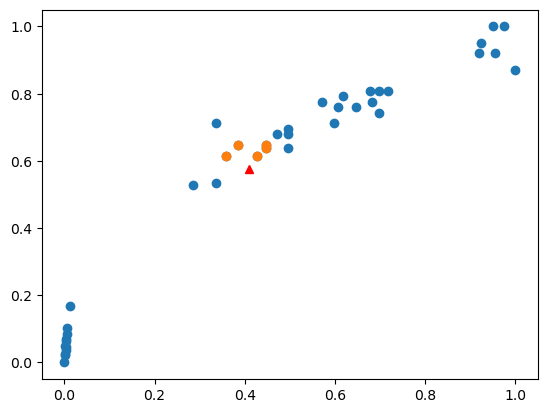

In [158]:
# 시각화로 확인
import matplotlib.pyplot as plt
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1])
plt.plot(new_data_scaled[0,0], new_data_scaled[0,1], 'r^')
plt.scatter(k_weight, k_length)
plt.show()

In [ ]:
### 2~3장이 

[5] 모델 성능 평가 ==> Score() 메서드 + 테스트 데이터셋